# Taak interpolatie - COVID-19

Sciensano, het Belgisch instituut voor gezondheid, heeft een data set vrijgegeven omtrent de gemeten COVID-19 infecties in Belgie.

Gebruik de code hieronder om de data set in te lezen.

In [32]:
import pandas as pd

data = pd.read_excel('COVID19BE.xlsx').dropna(0, 'any')
data['DATE'] = data['DATE'].astype('datetime64[s]')
data['WEEK'] = data['DATE'].dt.week

We hebben de data set ingelezen in een pandas data frame (zie https://pandas.pydata.org/docs/).<br>
<b>Indien nodig, installeer deze library gebruikmakend van 'conda install pandas' in de terminal.</b><br>
Een data frame volgt het principe van een CSV bestand. In dit geval, komt iedere rij overeen met een aantal bevestigde gevallen, met als parameters (kolommen): de dag en week van infectie, en de provincie, de regio (Vlaanderen, Brussel of Wallonie), de leeftijdsgroep en het geslacht van de geinfecteerde persoon.

<b>Bespreek</b> de volgende zaken door het aantal bevestigde gevallen <b>per week</b> te bekijken (gebruik kolom 'WEEK'):
1. Zijn er meer bevestigde gevallen in <i>Vlaanderen</i> dan in <i>Brussel</i>?
2. Zijn er meer bevestigde gevallen bij <i>vrouwen</i> in de <i>leeftijdsgroep 80-90</i> dan bij <i>vrouwen</i> in de <i>leeftijdsgroep 30-39</i>?

<b>Bespreek</b> zelf nog twee verschillende trends die je interessant vindt om met elkaar te vergelijken, maar bekijk dit keer het aantal bevestigde gevallen <b>per dag</b> (gebruik kolom 'DAG').

Aangezien je enkel data hebt gekregen, zul je <b>gepaste interpolatietechnieken</b> moeten gebruiken om beter inzicht in de trends te geven. <b>Bespreek voldoende</b> waarom je bepaalde technieken verkiest boven andere.

## Extra informatie

Pandas heeft meerdere methodes om (zonder for-loops) data te aggregeren en filteren.
Kijk specifiek naar de groupby, mean, sum, en count methodes, alsook hoe indexing werkt in de pandas documentatie.
Enkele voorbeelden worden hieronder gegeven.

Optioneel: Je kan ook gebruikmaken van de seaborn library om op een simpele manier data frames te plotten (zie https://seaborn.pydata.org/)

In [33]:
# Aggregatie: aantal infecties per provincie
infecties_per_provincie = data.groupby('PROVINCE').sum()[['CASES']]
print(infecties_per_provincie)

# Filtering: behoudt enkel de infecties in Namen
infecties_in_namen = data.loc[data['PROVINCE'] == 'Namur']
print(infecties_in_namen)

                CASES
PROVINCE             
Antwerpen        5632
BrabantWallon    1149
Brussels         4599
Hainaut          5253
Limburg          5135
Liège            5680
Luxembourg       1217
Namur            1674
OostVlaanderen   5308
VlaamsBrabant    4396
WestVlaanderen   4951
           DATE PROVINCE    REGION AGEGROUP SEX  CASES  WEEK
47   2020-03-03    Namur  Wallonia    40-49   F      1    10
94   2020-03-04    Namur  Wallonia    10-19   M      1    10
141  2020-03-05    Namur  Wallonia    60-69   M      1    10
201  2020-03-06    Namur  Wallonia    50-59   M      2    10
202  2020-03-06    Namur  Wallonia    50-59   F      1    10
...         ...      ...       ...      ...  ..    ...   ...
8110 2020-04-25    Namur  Wallonia    20-29   F      1    17
8111 2020-04-25    Namur  Wallonia    40-49   F      1    17
8112 2020-04-25    Namur  Wallonia    70-79   M      1    17
8113 2020-04-25    Namur  Wallonia    80-89   F      1    17
8114 2020-04-25    Namur  Wallonia      90+

## START TAAK:

<b> 1. Zijn er meer bevestigde gevallen in <i>Vlaanderen</i> dan in <i>Brussel</i>? </b>

In [34]:
infecties_in_brussels = data.loc[data['PROVINCE'] == 'Brussels']

vlaanderen = ['Antwerpen','Limburg','OostVlaanderen','WestVlaanderen','VlaamsBrabant']
infecties_in_vlaanderen = data.loc[(data['PROVINCE'].isin(vlaanderen))]

print("Bevestigde gevallen in Vlaanderen:")
print(infecties_in_vlaanderen.sum()[['CASES']]) 

print("Bevestigde gevallen in Brussel:")
print(infecties_in_brussels.sum()[['CASES']])


Bevestigde gevallen in Vlaanderen:
CASES    25422
dtype: int64
Bevestigde gevallen in Brussel:
CASES    4599
dtype: int64


   WEEK  CASES
0     9      6
1    10     34
2    11    172
3    12    375
4    13    951
5    14    966
6    15    915
7    16    821
8    17    359
   WEEK  CASES
0     9      8
1    10    256
2    11    697
3    12   2004
4    13   4792
5    14   5338
6    15   6756
7    16   3598
8    17   1973


Text(0.5, 1, 'Aantal bevestigde infecties in vlaanderen per week')

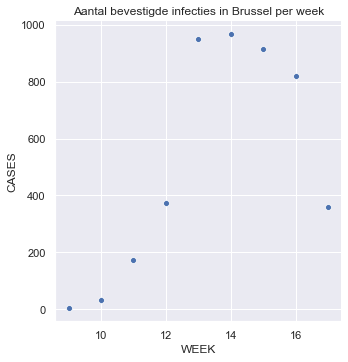

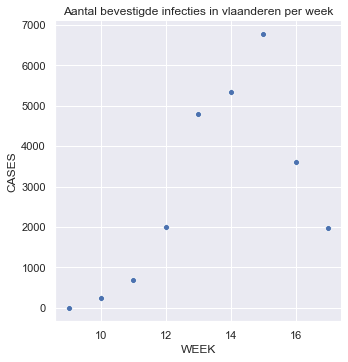

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt


infecties_in_brussels_sumweek = infecties_in_brussels.groupby('WEEK')['CASES'].sum().reset_index()

print(infecties_in_brussels_sumweek)

sns.set()
sns.relplot('WEEK', 'CASES', data=infecties_in_brussels_sumweek)
plt.title('Aantal bevestigde infecties in Brussel per week')

infecties_in_vlaanderen_sumweek = infecties_in_vlaanderen.groupby('WEEK')['CASES'].sum().reset_index()

print(infecties_in_vlaanderen_sumweek)

sns.set()
sns.relplot('WEEK', 'CASES', data=infecties_in_vlaanderen_sumweek)
plt.title('Aantal bevestigde infecties in vlaanderen per week')


Hulp functies voor interpolatie:

In [36]:
def list2column(v):
    """
    Transponeer een lijst van elementen naar een kolomvector.
    """
    return np.asmatrix(v).transpose()

def column2list(v):
    """
    Transponeer een kolomvector naar een lijst van elementen.
    """
    return np.array(v.transpose())[0]


def create_gaussian_rbf(z):
    """
    Create a Gaussian RBF.
    """
    return lambda x: math.exp(-(x - z)**2) #

def interpolate(xis, fis, phis):
    """
    Return an interpolation through points (xi, fi) with basis functions phis.
    """
    A = np.asmatrix([[phi(xi) for phi in phis] for xi in xis])
    weights = np.linalg.inv(A)*list2column(fis)
    weights = column2list(weights)
    def y(x):
        return sum(map(lambda w, phi: w*phi(x), weights, phis))
    return y

def stuksgewijze_interpolatie(X, Y):
    spline = splrep(X, Y, k=1, s=0)
    function = PPoly.from_spline(spline)
    return function

def veelterm_interpolatie(X, Y):
    n = len(X)
    P = np.asmatrix([[X[i]**j for j in range(n)] for i in range(n)])
    a = np.linalg.solve(P, Y)
    function = lambda x: np.polyval(a[::-1], x)
    return function

Code interpolatie Brussel:

[9, 10, 11, 12, 13, 14, 15, 16, 17]


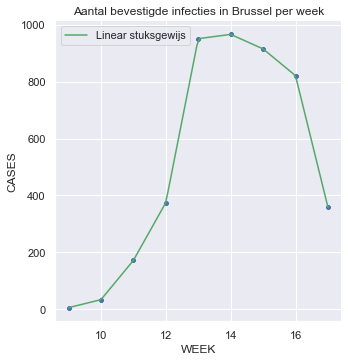

In [37]:
import math
import numpy as np
X_temp = infecties_in_brussels_sumweek['WEEK'].values.tolist()
Y_temp = infecties_in_brussels_sumweek['CASES'].values.tolist()
X_func = np.linspace(X_temp[0], X_temp[-1], 100)

sns.set()
sns.relplot('WEEK', 'CASES', data=infecties_in_brussels_sumweek)
plt.title('Aantal bevestigde infecties in Brussel per week')

print(X_temp)
from scipy.interpolate import PPoly, splrep


function = stuksgewijze_interpolatie(X_temp, Y_temp)
Y_func = list(map(function, X_func))
plt.plot(X_func, Y_func, 'g-', label="Linear stuksgewijs")
plt.legend()


Code interpolatie Vlaanderen:

[9, 10, 11, 12, 13, 14, 15, 16, 17]


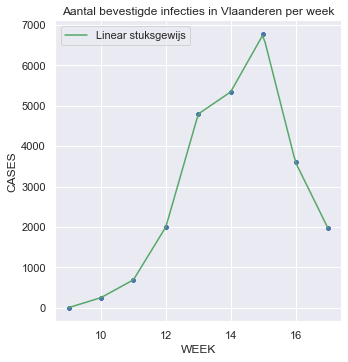

In [38]:
import math
import numpy as np
X_temp = infecties_in_vlaanderen_sumweek['WEEK'].values.tolist()
Y_temp = infecties_in_vlaanderen_sumweek['CASES'].values.tolist()
X_func = np.linspace(X_temp[0], X_temp[-1], 100)

sns.set()
sns.relplot('WEEK', 'CASES', data=infecties_in_vlaanderen_sumweek)
plt.title('Aantal bevestigde infecties in Vlaanderen per week')

print(X_temp)
from scipy.interpolate import PPoly, splrep


function = stuksgewijze_interpolatie(X_temp, Y_temp)
Y_func = list(map(function, X_func))
plt.plot(X_func, Y_func, 'g-', label="Linear stuksgewijs")
plt.legend()

<b> 2. Zijn er meer bevestigde gevallen bij <i>vrouwen</i> in de <i>leeftijdsgroep 80-90</i> dan bij <i>vrouwen</i> in de <i>leeftijdsgroep 30-39</i>? </b>

In [39]:
infecties_vrouwen= data.loc[data['SEX'] == 'F']


vrouwen80_90plus = ['80-89','90+']
infecties_vrouwen_80_90 = infecties_vrouwen.loc[(data['AGEGROUP'].isin(vrouwen80_90plus))]

infecties_vrouwen_30_39 = infecties_vrouwen.loc[(data['AGEGROUP'] == '30-39')]

test = infecties_vrouwen.groupby('AGEGROUP').sum()[['CASES']]

print(test)

print("Bevestigde gevallen vrouwen 80-90:")
print(infecties_vrouwen_80_90.sum()[['CASES']]) 

print("Bevestigde gevallen vrouwen 30-39:")
print(infecties_vrouwen_30_39.sum()[['CASES']])


          CASES
AGEGROUP       
0-9         103
10-19       224
20-29      2771
30-39      3255
40-49      3797
50-59      3956
60-69      1988
70-79      2573
80-89      6024
90+        3606
Bevestigde gevallen vrouwen 80-90:
CASES    9630
dtype: int64
Bevestigde gevallen vrouwen 30-39:
CASES    3255
dtype: int64


   WEEK  CASES
0     9      1
1    10     25
2    11    108
3    12    243
4    13    565
5    14    687
6    15    790
7    16    554
8    17    282
   WEEK  CASES
0    10      5
1    11     72
2    12    298
3    13    777
4    14   1732
5    15   3097
6    16   2422
7    17   1227


Text(0.5, 1, 'Aantal bevestigde infecties vrouwen tussen 80 en 90+ jaar')

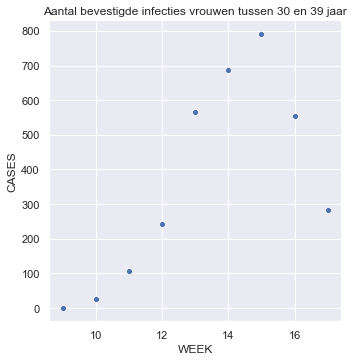

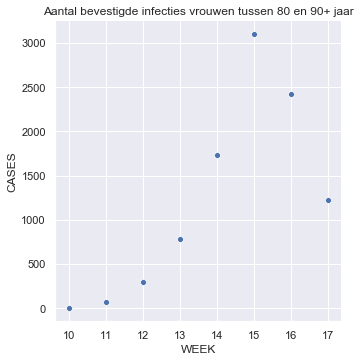

In [40]:
infecties_vrouwen_30_39_sumweek = infecties_vrouwen_30_39.groupby('WEEK')['CASES'].sum().reset_index()

print(infecties_vrouwen_30_39_sumweek)

sns.set()
sns.relplot('WEEK', 'CASES', data=infecties_vrouwen_30_39_sumweek)
plt.title('Aantal bevestigde infecties vrouwen tussen 30 en 39 jaar')

infecties_vrouwen_80_90_sumweek = infecties_vrouwen_80_90.groupby('WEEK')['CASES'].sum().reset_index()

print(infecties_vrouwen_80_90_sumweek)

sns.set()
sns.relplot('WEEK', 'CASES', data=infecties_vrouwen_80_90_sumweek)
plt.title('Aantal bevestigde infecties vrouwen tussen 80 en 90+ jaar')

Code interpolatie vrouwen 30-39:

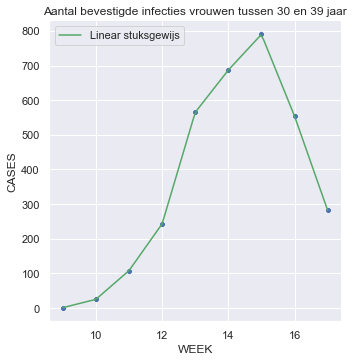

In [41]:
X_temp = infecties_vrouwen_30_39_sumweek['WEEK'].values.tolist()
Y_temp = infecties_vrouwen_30_39_sumweek['CASES'].values.tolist()
X_func = np.linspace(X_temp[0], X_temp[-1], 100)

sns.set()
sns.relplot('WEEK', 'CASES', data=infecties_vrouwen_30_39_sumweek)
plt.title('Aantal bevestigde infecties vrouwen tussen 30 en 39 jaar')



function = stuksgewijze_interpolatie(X_temp, Y_temp)
Y_func = list(map(function, X_func))
plt.plot(X_func, Y_func, 'g-', label="Linear stuksgewijs")
plt.legend()

Code interpolatie vrouwen 80-90+:

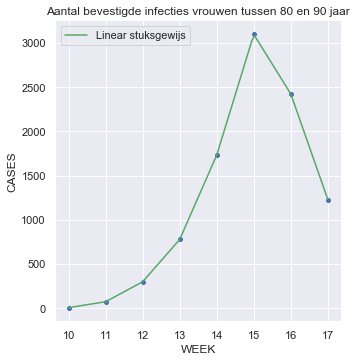

In [42]:
X_temp = infecties_vrouwen_80_90_sumweek['WEEK'].values.tolist()
Y_temp = infecties_vrouwen_80_90_sumweek['CASES'].values.tolist()
X_func = np.linspace(X_temp[0], X_temp[-1], 100)

sns.set()
sns.relplot('WEEK', 'CASES', data=infecties_vrouwen_80_90_sumweek)
plt.title('Aantal bevestigde infecties vrouwen tussen 80 en 90 jaar')



function = stuksgewijze_interpolatie(X_temp, Y_temp)
Y_func = list(map(function, X_func))
plt.plot(X_func, Y_func, 'g-', label="Linear stuksgewijs")
plt.legend()